In [1]:
from importlib import reload
import sys
sys.path.insert(1,"/home/bsdz/git/typetheory/typetheory")
from typetheory.expression import Expression
from typetheory.arity import ArityArrow, ArityCross, A0
from typetheory.definitions import plus, mult, integral, x, y, z, a, b, NaturalNumber, sum_

sin_y = Expression('sin(y)')
sin_x = Expression('sin(x)')

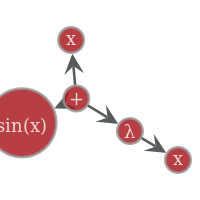

<Graph object, directed, with 5 vertices and 4 edges at 0x7ff11e375c18>

In [2]:
plus.apply(x, sin_x).abstract(x).render_graph()

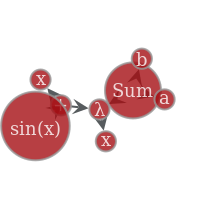

<Graph object, directed, with 8 vertices and 7 edges at 0x7ff11e37c828>

In [3]:
sum_.apply(plus.apply(x, sin_x).abstract(x), a,b).render_graph()

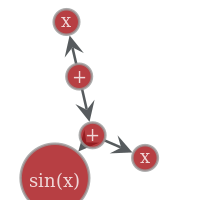

<Graph object, directed, with 5 vertices and 4 edges at 0x7ff11e37c860>

In [4]:
plus.apply(x,plus.apply(x, sin_x)).render_graph()

In [5]:
plus.apply(y, sin_y).abstract(y)

(y)+(y, sin(y))

In [6]:
plus.apply(y, sin_y)

+(y, sin(y))

In [7]:
integral.apply(plus.apply(x, sin_x).abstract(x), a,b)

Integral((x)+(x, sin(x)), a, b)

In [8]:
NaturalNumber('n')

in(n, N)

In [9]:
NaturalNumber('p')

in(p, N)

In [10]:
n = NaturalNumber('n')
p = NaturalNumber('p')
plus.apply(n,p)

+(in(n, N), in(p, N))

In [11]:
[type(p) for p in p.applications]

[typetheory.expression.Expression, typetheory.expression.Expression]

In [12]:
sum_.apply(plus.apply(x, sin_x).abstract(x), a,b)

Sum((x)+(x, sin(x)), a, b)

In [13]:
plus.apply(plus.apply(a,b),z)

+(+(a, b), z)

In [14]:
mult.apply(z,plus.apply(x, y))

*(z, +(x, y))

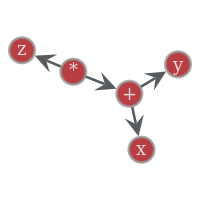

<Graph object, directed, with 5 vertices and 4 edges at 0x7ff158b84a20>

In [15]:
gexpr = mult.apply(z,plus.apply(x, y)).render_graph()
gexpr

In [16]:
plus.apply(x, y)

+(x, y)

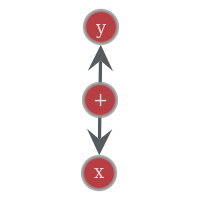

<Graph object, directed, with 3 vertices and 2 edges at 0x7ff158b8d860>

In [17]:
hexpr = plus.apply(x, y).render_graph()
hexpr

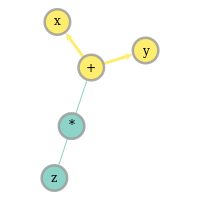

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7ff158b84a20, at 0x7ff158b593c8>

In [18]:
from graph_tool.topology import subgraph_isomorphism, mark_subgraph
from graph_tool.draw import graph_draw
vertex_maps = subgraph_isomorphism(hexpr, gexpr, max_n=100, vertex_label=(hexpr.vp["label"],gexpr.vp["label"]))

for i, vm in enumerate(vertex_maps):
   gexpr.set_vertex_filter(None)
   gexpr.set_edge_filter(None)
   vmask, emask = mark_subgraph(gexpr, hexpr, vm)
   gexpr.set_vertex_filter(vmask)
   gexpr.set_edge_filter(emask)

gexpr.set_vertex_filter(None)
gexpr.set_edge_filter(None)
ewidth = gexpr.copy_property(emask, value_type="double")
ewidth.a += 0.5
ewidth.a *= 2
graph_draw(gexpr, 
           vertex_text=gexpr.vp["label"],
           vertex_fill_color=vmask, 
           edge_color=emask,
           edge_pen_width=ewidth, 
           output_size=(200, 200),              
           output="test.png")
